# **Tugas Besar Data Mining Kelompok 9**

---

Anggota :

1. Nathaniel Yusuf Langelo  - 102022480033
2. Achmad Fanial Hubaib     - 102022480027
3. Fikri Muhammad Awaludin  - 1020224800288

### **Business Understanding**
---

Tujuan Bisnis:
Mendeteksi risiko serangan jantung sedini mungkin berdasarkan data medis dan gaya hidup pasien. Hal ini bertujuan untuk membantu rumah sakit, klinik, atau aplikasi kesehatan dalam memberikan peringatan atau saran medis preventif kepada pasien yang memiliki risiko tinggi terkena serangan jantung.

Tujuan Analitik:
Mengembangkan model prediksi klasifikasi yang dapat mengidentifikasi apakah seorang pasien berisiko terkena serangan jantung berdasarkan fitur-fitur klinis dan demografis seperti usia, tekanan darah, kolesterol, detak jantung maksimum, dan lain-lain.

Dataset ini berisi informasi mengenai kumpulan data penyakit jantung di rumah sakit Zheen di Erbil, Irak, dari Januari 2019 hingga Mei 2019. Berikut informasi kolom-kolom yang terdapat dalam dataset:

1. **Age**: Usia pasien

2. **Gender**: Jenis kelamin pasien (1 = Pria/ 0 = Wanita)

3. **Hearth Rate**: Jumlah detak jantung per menit

4. **Systolic blood pressure** : Tekanan dalam arteri saat jantung berkontraksi

5. **Diastolic blood pressure**: Tekanan di arteri saat detak jantung

6. **Blood sugar**: Tingkat glukosa darah pasien

7. **CK-MB**: Enzim jantung yang dilepaskan selama kerusakan otot jantung

8. **Troponin**: Biomarker protein yang sangat spesifik untuk cedera otot jantung

9. **Result**: Label hasil yang menunjukkan apakah pasien mengalami serangan jantung atau tidak

### **Data Understanding**
---

In [157]:
import pandas as pd

In [158]:
df = pd.read_csv('Medicaldataset.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [160]:
# Melihat Deskripsi dataset
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [161]:
# Melihat jumlah baris dan kolom dataset
df.shape

(1319, 9)

In [162]:
# Melihat missing value pada data
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [163]:
# Hapus baris dengan missing values 
df_cleaned = df.dropna()

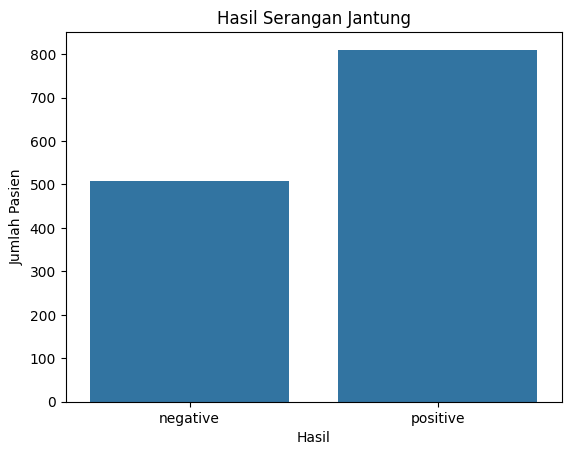

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot hasil serangan Jantung
sns.countplot(x='Result', data=df)
plt.title('Hasil Serangan Jantung')
plt.ylabel('Jumlah Pasien')
plt.xlabel('Hasil')
plt.show()

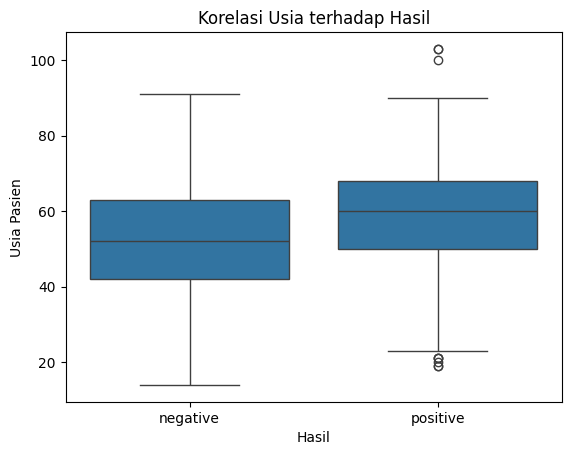

In [165]:
# Boxplot usia terhadap hasil
sns.boxplot(x='Result', y='Age', data=df)
plt.title('Korelasi Usia terhadap Hasil')
plt.ylabel('Usia Pasien')
plt.xlabel('Hasil')
plt.show()

C:\Users\Niel\AppData\Local\Temp\ipykernel_22940\4209056666.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gender.set_xticklabels(['Perempuan', 'Laki-laki'])


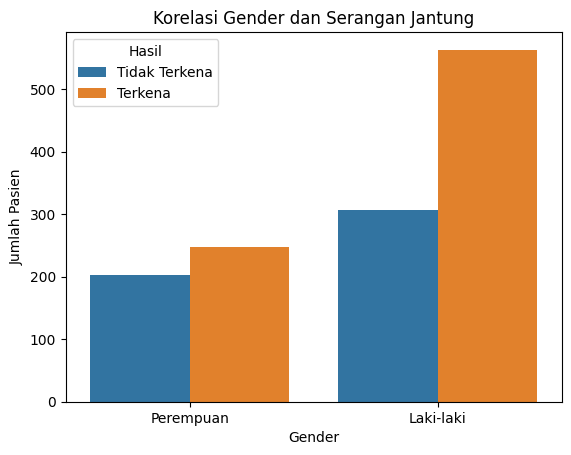

In [166]:
# Plot Hubungan Gender dan hasil
gender = sns.countplot(x='Gender', hue='Result', data=df)
gender.set_xticklabels(['Perempuan', 'Laki-laki'])
plt.title('Korelasi Gender dan Serangan Jantung')
plt.ylabel('Jumlah Pasien')
plt.xlabel('Gender')
plt.legend(title='Hasil', labels=['Tidak Terkena', 'Terkena'])
plt.show()

### **Data Preparation**
---

In [167]:
# One-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df_cleaned, columns=['Result'], drop_first=False)

In [168]:
# Menentukan kolom numerik yang akan dinormalisasi
# Identifikasi kolom numerik (tanpa kolom hasil encoded)
exclude_cols = ['Result_negative', 'Result_positive']
numerical_cols = [col for col in df_encoded.columns if col not in exclude_cols]

In [169]:
from sklearn.preprocessing import MinMaxScaler
# Scaling
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [184]:
# Final Output 
print("== Data Setelah Dipersiapkan ==")
print()
print(df_encoded.head())
# print(df_encoded.info())

== Data Setelah Dipersiapkan ==

        Age  Gender  Heart rate  Systolic blood pressure  \
0  0.561798     1.0    0.042163                 0.651934   
1  0.078652     1.0    0.067828                 0.309392   
2  0.460674     1.0    0.040330                 0.651934   
3  0.561798     1.0    0.045830                 0.430939   
4  0.460674     1.0    0.040330                 0.386740   

   Diastolic blood pressure  Blood sugar     CK-MB  Troponin  Result_negative  \
0                  0.387931     0.247036  0.004935  0.001068             True   
1                  0.068966     0.515810  0.021453  0.102826            False   
2                  0.336207     0.464427  0.005569  0.000194             True   
3                  0.146552     0.464427  0.045212  0.011749            False   
4                  0.232759     0.523715  0.002533  0.000194             True   

   Result_positive  Cluster  
0            False        0  
1             True        1  
2            False        0  

### **Modeling**
---

#### Splitting Data

In [171]:
#Memisahkan data uji dan data latih 
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Result_positive'],axis=1)  # Variabel independen
y = df_encoded['Result_positive']  # Variabel Dependen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
#Melihat distribusi target
y.value_counts(normalize=True)

Result_positive
True     0.614102
False    0.385898
Name: proportion, dtype: float64

#### Modelling Klasifikasi Data Testing

In [173]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Implementasi model pada data testing

In [174]:
# Membuat prediksi dari model yang sudah dilatih
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#### Evaluasi Performa Model Pada Data Testing

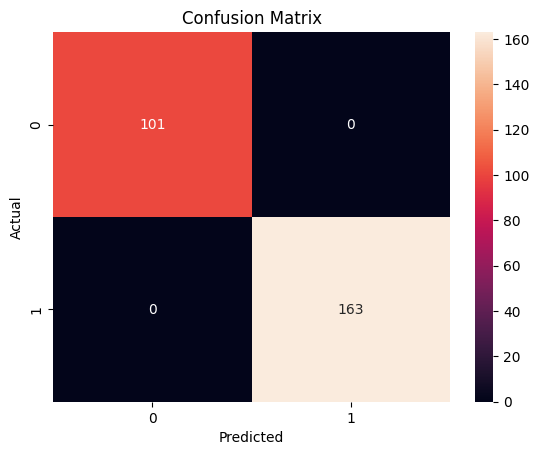

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       101
        True       1.00      1.00      1.00       163

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264

ROC AUC Score: 1.0


In [175]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Evaluasi ROC AUC
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

### **Clustering**
---

#### Mencari jumlah kluster menggunakan metode Elbow

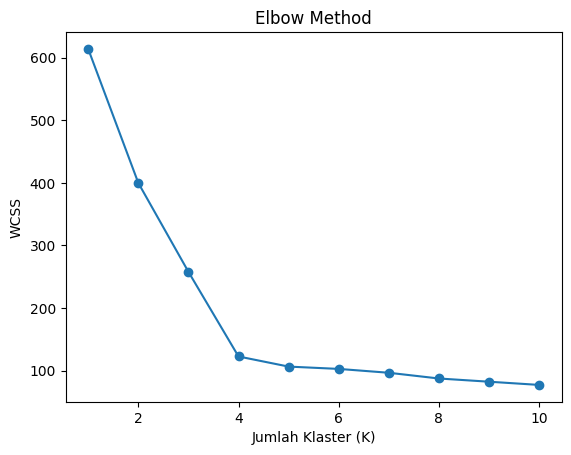

In [183]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

#### Metode Clustering K-Means

#### Visualisasi hasil cluster dalam scatter plot

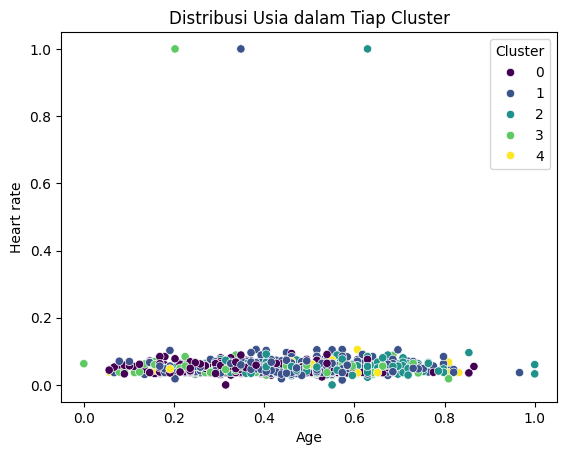

In [177]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_encoded)

df_encoded['Cluster'] = kmeans.labels_
# plt.scatter(x='Cluster', y='Age', data=df_encoded)
sns.scatterplot(x=df_encoded['Age'], y=df_encoded['Heart rate'], hue=df_encoded['Cluster'], palette='viridis')
plt.title('Distribusi Usia dalam Tiap Cluster')
plt.show()

#### Evaluasi performa Clustering

In [179]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
score = silhouette_score(X_train, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4608378444088111


#### Deskripsi masing-masing cluster

In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# a. Confusion Matrix dan Laporan
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

# b. AUC dan ROC Curve
auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)